## MAP0214 - Cálculo Numérico e aplicações em física
### Henrique Bueno de Lima - Nº USP: 9302305
### EP1 - Zeros de funções: Bissecção, Newton-Raphson, Secantes - Profº Arnaldo Gammal

Notebook no qual desenvolvi meu EP. Meus resultados são apresentados por etapas a), b) e c) ao longo do código:

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as pl
from astropy.table import Table

pl.rc('xtick', labelsize=16)
pl.rc('ytick', labelsize=16)

### a) Cálculo da raiz de $f(x) = x³ - \cos(x²)$ pelo método da bissecção:

In [2]:
tabela1 = Table(names=('Iteração N', 'a', 'b', 'xm', 'f(xm)' ), dtype=('i4', 'f4', 'f4','f4', 'f4')) # Formato da minha tabela 1

def raiz_Bissec(funcao, x, precisao):
    a = x[0]
    b = x[-1]
    N=0
    while(abs(b-a) > precisao): # Enquanto não atinjo a precisão, o método continua
        xm = (a+b)/2
        fm = funcao(xm)
        tabela1.add_row((N, a, b, xm, fm)) # A cada passo, a função preenche a tabela.
        if (funcao(a)*funcao(xm)>0): # Se os sinais forem iguais, xa recebe xm
            a = xm
            fm = funcao(a)
        else:
            b = xm
            fm = funcao(b)
        N = N+1
    x0 = b #Após atingir minha precisão, o valor final é um dos estremos.
    
    print('O zero da função está no intervalo de x: [%.3f, %.3f]'%(a, b))
    return x0

def funcao1(x):
    return x**3 - np.cos(x**2)

In [3]:
x = [-2., 2.] # Defini meu intervalo
x0 = raiz_Bissec(funcao1, x, 0.001)
print('x0 =%.5f e f(x0) = %.5f'% (x0, funcao1(x0)))
tabela1

O zero da função está no intervalo de x: [0.889, 0.890]
x0 =0.88965 e f(x0) = 0.00134


Iteração N,a,b,xm,f(xm)
int32,float32,float32,float32,float32
0,-2.0,2.0,0.0,-1.0
1,0.0,2.0,1.0,0.4596977
2,0.0,1.0,0.5,-0.8439124
3,0.5,1.0,0.75,-0.4240495
4,0.75,1.0,0.875,-0.051027507
5,0.875,1.0,0.9375,0.18598086
6,0.875,0.9375,0.90625,0.063015066
7,0.875,0.90625,0.890625,0.0048958315
8,0.875,0.890625,0.8828125,-0.023338055


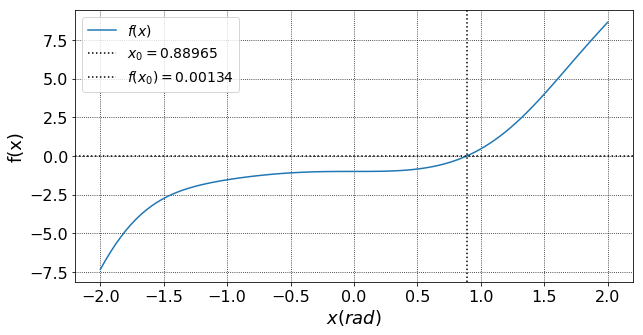

In [4]:
xplot = np.linspace(-2, 2, 100)
pl.rcParams['figure.figsize'] = (10, 5)
pl.plot(xplot, funcao1(xplot), label='$f (x)$')
pl.axvline(x = x0,ls = ':',c = 'k', label=r'$x_0 = {:.{prec}f}$'.format(x0, prec = 5))
pl.axhline(y = funcao1(x0),ls = ':',c = 'k', label=r'$f(x_0) = {:.{prec}f}$'.format(funcao1(x0), prec = 5))
pl.legend(fontsize=14)
pl.xlabel(r'$x(rad)$', fontsize=18)
pl.ylabel(r'f(x)', fontsize=18)
pl.grid(ls=':',c='k')

### b) Agora usando o método de Newton-Raphson:

In [5]:
tabela2 = Table(names=('Iteração N', '$x_0$', '$f(x_0)$', '$ {\partial {f(x_0)}}/{\partial x}$'), dtype=('i4', 'f4', 'f4','f4')) # Formato da minha tabela 2

def derivada_funcao1(x):
    return 3 * x**2 + np.sin(x**2) * 2*x
        
def raiz_Newton(funcao, x, precisao):
    x0 = x
    for i in range(100): # Aqui, defino o máximo de iterações como 100.
        tabela2.add_row((i, x0, funcao(x0), derivada_funcao1(x0))) # A cada passo, a função preenche a tabela.
        if abs(funcao(x0)) < precisao: # x0 próximo o suficiente de ser uma raiz
            print ('Raiz encontrada após %.i iterações' %i)
            return x0
        x0 = x0 - funcao(x0)/derivada_funcao1(x0)

In [6]:
x0 = raiz_Newton(funcao1, 2., 0.001) # como o método de Newton converge muito rápido, 
                                     # chutando o mesmo valor inicial que o método da bissecção, temos menos passos necessários.
    
print('x0= %.5f e f(x0)= %.5f'% (x0, funcao1(x0)))
tabela2

Raiz encontrada após 4 iterações
x0= 0.88928 e f(x0)= 0.00000


Iteração N,$x_0$,$f(x_0)$,$ {\partial {f(x_0)}}/{\partial x}$
int32,float32,float32,float32
0,2.0,8.653644,8.97279
1,1.0355682,0.63252884,5.03639
2,0.90997654,0.077204585,3.8247836
3,0.8897912,0.0018563443,3.64148
4,0.8892814,1.1675311e-06,3.6369


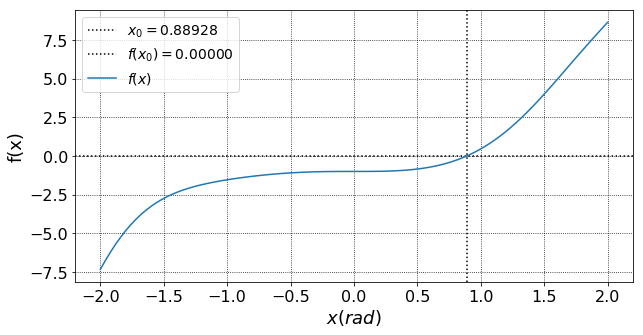

In [7]:
xplot = np.linspace(-2, 2, 100)
pl.axvline(x = x0,ls = ':',c = 'k', label=r'$x_0 = {:.{prec}f}$'.format(x0, prec = 5))
pl.axhline(y = funcao1(x0),ls = ':',c = 'k', label=r'$f(x_0) = {:.{prec}f}$'.format(funcao1(x0), prec = 5))
pl.plot(xplot, funcao1(xplot), label='$f (x)$')
pl.legend(fontsize=14)
pl.xlabel(r'$x(rad)$', fontsize=18)
pl.ylabel(r'f(x)', fontsize=18)
pl.grid(ls=':',c='k')

### c) Molécula de NaF
$V(r)= - \frac{e²}{4\pi \epsilon_0 r} + V_0 e^{-\frac{r}{r_0}}$ e $F(r) = \frac{-e²}{4\pi \epsilon_0 r²} + \frac{V_0}{r_o} e^{-\frac{r}{r_0}}$

In [8]:
import astropy.units as u
import scipy.constants as c
e = c.e * u.C
eps_zero = c.epsilon_0 * u.C**2/(u.N * u.m**2)
K=(e**2/(4*np.pi*eps_zero)).to(u.eV * u.angstrom)
V0 = 0.667 * 10**3 * u.eV
r0 = 0.290 * u.angstrom
print('Aqui apenas calculei a constante K do enunciado:')
K

Aqui apenas calculei a constante K do enunciado:


<Quantity 14.39964535 Angstrom eV>

In [9]:
tabela3 = Table(names=('Iteração N', '$x_0$', '$f(x_0)$', '$x_1$', '$f(x_1)$'), dtype=('i4', 'f4', 'f4','f4','f4')) # Formato da minha tabela 3

def V(r):
    return - K/r + V0 * np.exp(-r/r0)
def F(r):
    return - K/r**2 + V0/r0 * np.exp(-r/r0)

In [10]:
def derivada_secante(f,x0,x1): # Substituir a derivada do método de Newton pelo retorno dessa função , resulta no método das secantes.
    return (f(x1) - f(x0))/(x1-x0)

def raiz_Secantes(funcao, x0, x1, precisao):
    for N in range(100): # Aqui, defino o máximo de iterações como 100.
        if abs(funcao(x0)) < precisao: # x0 próximo o suficiente de ser uma raiz
            tabela3.add_row((N, x0, funcao(x0), x1, funcao(x1))) # Preenche o último resultado na tabela
            return x0
        tabela3.add_row((N, x0, funcao(x0), x1, funcao(x1))) # A cada passo, a função preenche a tabela.
        aux = x1
        x1 = x1 - funcao(x1)/derivada_secante(funcao, x0, x1)
        x0 = aux

In [11]:
r_minV = raiz_Secantes(F,0.5, 2., 0.001) # O zero da força é o ponto do mínimo do potencial.

print('r_minV= %.5f e F(r_minV)= %.5f eV/Angstrom \n O mínimo do potencial em r_minV é V(r_minV) = %.5f eV'% (r_minV, F(r_minV), V(r_minV)))
tabela3

r_minV= 1.81800 e F(r_minV)= -0.00014 eV/Angstrom 
 O mínimo do potencial em r_minV é V(r_minV) = -6.65717 eV


Iteração N,$x_0$,$f(x_0)$,$x_1$,$f(x_1)$
int32,float32,float32,float32,float32
0,0.5,352.55286,2.0,-1.2739983
1,2.0,-1.2739983,1.9945991,-1.2497967
2,1.9945991,-1.2497967,1.7156886,1.3078061
3,1.7156886,1.3078061,1.8583068,-0.37851316
4,1.8583068,-0.37851316,1.8262945,-0.083491795
5,1.8262945,-0.083491795,1.817235,0.007705038
6,1.817235,0.007705038,1.8180004,-0.00013805537
7,1.8180004,-0.00013805537,1.817987,-2.225585e-07


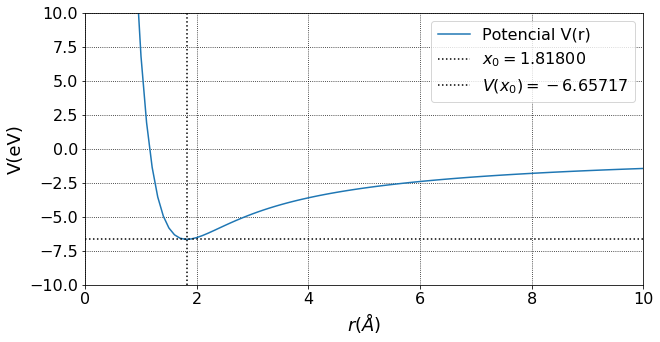

In [12]:
raio_plot = np.linspace(0.1, 10, 100)
pl.plot(raio_plot, V(raio_plot), label='Potencial V(r)')
pl.axvline(x = r_minV,ls = ':',c = 'k', label=r'$x_0 = {:.{prec}f}$'.format(r_minV, prec = 5))
pl.axhline(y = V(r_minV),ls = ':',c = 'k', label=r'$V(x_0) = {:.{prec}f}$'.format(V(r_minV), prec = 5))
pl.legend(fontsize=16)
pl.xlabel(r'$r(\AA)$', fontsize=18)
pl.ylabel(r'V(eV)', fontsize=18)
pl.xlim(0, 10)
pl.ylim(-10,10)
pl.grid(ls=':',c='k')

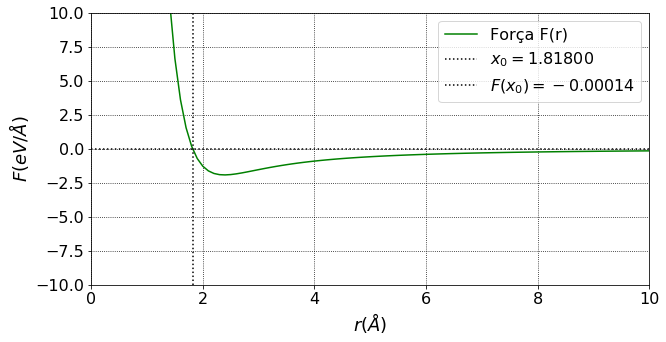

In [13]:
pl.plot(raio_plot, F(raio_plot), label='Força F(r)', c='g')
pl.axvline(x = r_minV,ls = ':',c = 'k', label=r'$x_0 = {:.{prec}f}$'.format(r_minV, prec = 5))
pl.axhline(y = F(r_minV),ls = ':',c = 'k', label=r'$F(x_0) = {:.{prec}f}$'.format(F(r_minV), prec = 5))
pl.legend(fontsize=16)
pl.xlabel(r'$r(\AA)$', fontsize=18)
pl.xlim(0, 10)
pl.ylim(-10,10)
pl.ylabel(r'$F(eV/\AA)$', fontsize=18)
pl.grid(ls=':',c='k')